# Chapter 5 Two orbital model
## 1. Fe based componunds

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


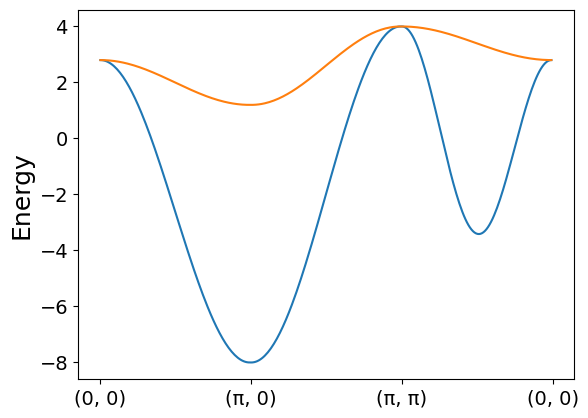

In [3]:
def calc_HFekxky_test(kx,ky,μ):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb += (-μ)*np.eye(N)
    t1 = -1.0
    t2 = 1.3
    t3 = -0.85
    t4 = -0.85
    #
    Ex = -2*t1*np.cos(kx) -2*t2*np.cos(ky) -4*t3*np.cos(kx)*np.cos(ky)
    Ey = -2*t2*np.cos(kx) -2*t1*np.cos(ky) -4*t3*np.cos(kx)*np.cos(ky)
    Exy = -4*t4*np.sin(kx)*np.sin(ky)
    mat_Htb[0, 0] = Ex
    mat_Htb[0, 1] = Exy
    mat_Htb[1, 0] = Exy
    mat_Htb[1, 1] = Ey
    return mat_Htb



kx1 = np.linspace(0,np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(np.pi,np.pi, 100)
ky2 = np.linspace(0,np.pi, 100)
kx3 = np.linspace(np.pi,0, 100)
ky3 = np.linspace(np.pi, 0, 100)

kx = np.concatenate([kx1, kx2, kx3])
ky = np.concatenate([ky1, ky2, ky3])
band_down = []
band_up = []

# Diagonalization 
for x, y in zip(kx, ky):
    mat_H =  calc_HFekxky_test(x,y,1.45)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    band_down.append(energy[0])
    band_up.append(energy[1])


plt.plot(band_down, label = "Diagonaliza")
plt.plot(band_up, label = "Diagonaliza")
plt.ylabel("Energy", fontsize = 18)
plt.xticks([0, 100, 200, 300], ["(0, 0)", "(π, 0)", "(π, π)", "(0, 0)"])
plt.tick_params(labelsize=14)
plt.show()

C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\k708a\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


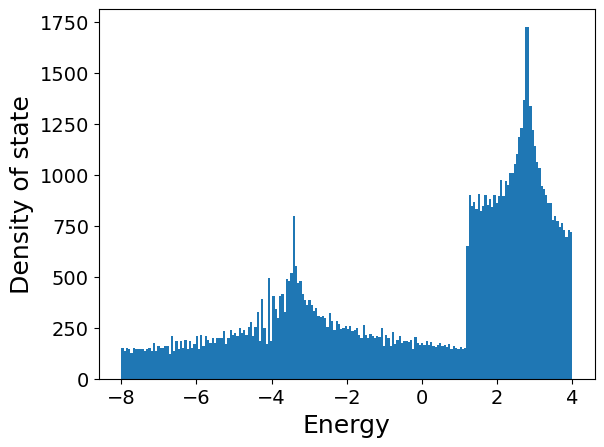

In [4]:
kx = np.linspace(-np.pi, np.pi, 200)
ky = np.linspace(-np.pi, np.pi, 200)
band_down = [] 
band_up = []

for x in kx:
    for y in ky:
        mat_H = calc_HFekxky_test(x,y,1.45)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        band_down.append(energy[0])
        band_up.append(energy[1])

bands = np.concatenate([band_up, band_down])
plt.hist(bands, bins = 200)
plt.xlabel("Energy", fontsize = 18)
plt.ylabel("Density of state", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()



C:\Users\k708a\AppData\Local\Temp\ipykernel_5472\2554669847.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  band[j][i] = energy[0]
C:\Users\k708a\AppData\Local\Temp\ipykernel_5472\2554669847.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  band2[j][i] = energy[1]


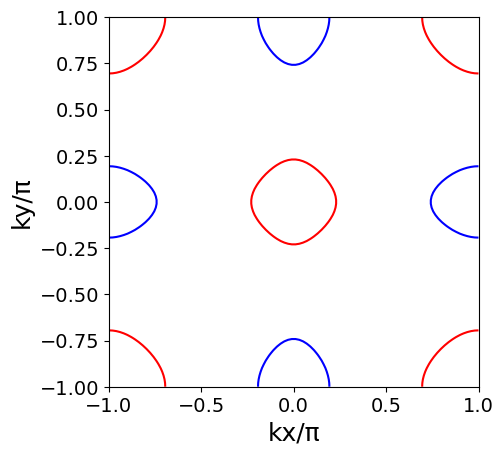

In [5]:

kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
kX, kY = np.meshgrid(kx, ky)
band = np.zeros((len(ky), len(kx)))
band2 = np.zeros((len(ky), len(kx)))
for i in range(len(kx)):
    for j in range(len(ky)):
        x = kx[i]
        y = ky[j]
        mat_H = calc_HFekxky_test(x,y,1.45)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        band[j][i] = energy[0]
        band2[j][i] = energy[1]

plt.contour(kX/np.pi, kY/np.pi, band, levels = [1.45], colors = "red")
plt.contour(kX/np.pi, kY/np.pi, band2, levels = [1.45], colors = "blue")
plt.gca().set_aspect('equal')
plt.xlabel("kx/π", fontsize = 18)
plt.ylabel("ky/π", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()